<a href="https://colab.research.google.com/github/vaibhavgp69/nlp-basics/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install opendatasets
!pip install pandas

import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import json


nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('maxent_treebank_pos_tagger')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
!wget https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
df=pd.read_csv("tmdb_5000_movies.csv")

--2023-04-07 11:59:41--  https://lazyprogrammer.me/course_files/nlp/tmdb_5000_movies.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5698602 (5.4M) [text/csv]
Saving to: ‘tmdb_5000_movies.csv’

tmdb_5000_movies.cs 100%[===================>]   5.43M  8.16MB/s    in 0.7s    

2023-04-07 11:59:42 (8.16 MB/s) - ‘tmdb_5000_movies.csv’ saved [5698602/5698602]



In [ ]:
df

In [4]:
def convert(row):
  genres=json.loads(row['genres'])
  genres= ' '.join(''.join(j['name'].split())for j in genres )

  kw=json.loads(row['keywords'])
  keywords= ' '.join(''.join(j['name'].split())for j in kw )

  sl=json.loads(row['spoken_languages'])
  sl= ' '.join(''.join(j['name'].split())for j in sl )

  return "%s %s %s" % (sl,genres,keywords)

In [5]:
df['string']=df.apply(convert,axis=1)
df['string'][4801]


'English  '

In [6]:
df2=df[['string','original_title']]
df2

,string,original_title
0,English Español Action Adventure Fantasy Scien...,Avatar
1,English Adventure Fantasy Action ocean drugabu...,Pirates of the Caribbean: At World's End
2,Français English Español Italiano Deutsch Acti...,Spectre
3,English Action Crime Drama Thriller dccomics c...,The Dark Knight Rises
4,English Action Adventure ScienceFiction basedo...,John Carter
...,...,...
4798,Español Action Crime Thriller unitedstates–mex...,El Mariachi
4799,Comedy Romance,Newlyweds
4800,English Comedy Drama Romance TVMovie date love...,"Signed, Sealed, Delivered"
4801,English,Shanghai Calling


In [56]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
vect=TfidfVectorizer(stop_words='english',max_features=1000)

X=vect.fit_transform(df2['string'])
# Y=df2['original_title']
# Y.index
Y=pd.Series(data=df2['original_title'].index,index=df2['original_title'])
Y['Scream']



2282

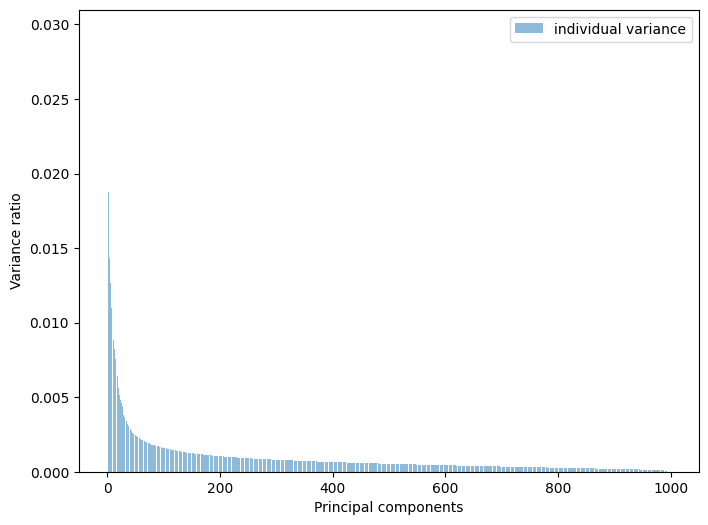

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
pca.fit_transform(X.toarray())
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(1000), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

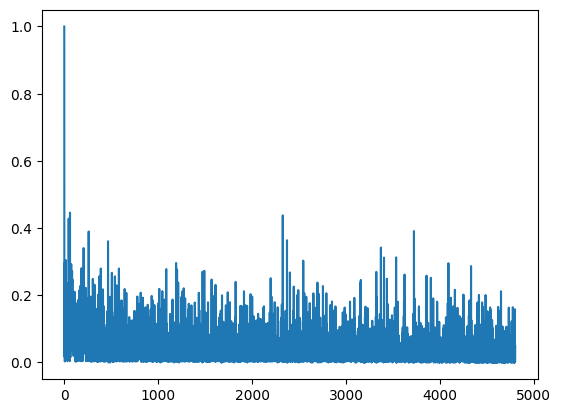

In [58]:
from sklearn.metrics.pairwise import cosine_similarity
Y['Scream']
print()
sim=cosine_similarity(X[Y['Avatar']],X)
plt.plot(sim.flatten())   #flatten cz to make it 1d

In [59]:
df['original_title']
for i in (np.argsort(sim.flatten())[-6:-1]):
  print("\n --> ",df['original_title'][i])



 -->  Ender's Game

 -->  Falcon Rising

 -->  Star Trek Into Darkness

 -->  Predator

 -->  Jupiter Ascending
